<a href="https://colab.research.google.com/github/internetian/Data-Factory/blob/master/KOSPI200%EC%9D%BC%EC%9E%90%EB%B3%84%EC%8B%9C%EC%84%B8%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%8F_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###한국증권거래소 KOSPI200 지수 크롤링 및 예측
- 페이스북  FBprophet 사용

In [1]:
from bs4 import BeautifulSoup
import pandas as pd 
import requests
import json
import time

In [2]:
head={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
       'Host': 'marketdata.krx.co.kr'}
param={'bld':'MKD/03/0304/03040101/mkd03040101T2_02','name':'form'}

response=requests.get('http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx',params=param,headers=head)
print(response.text)

#코스피200 지수
#bld: MKD/03/0304/03040101/mkd03040101T2_02
#name: form

iD222pZMoMqiGx7rdzGeRZ068HfKkvJhpKkYAsDeHn0U6MRMX0qvJWFGKX0aSpqolRosBkPFpxrYrD3iqHEztnUGG8oFrndlKT7pR4Pqof1CReGNCoIgcYl3nR+FTVNI+8KRcmJLjf206qPzThjbvD6EMBIBp6O8eX4Y8H26t5k=


In [3]:
payload={'idx_cd': '1028',
'ind_tp_cd': '1',
'idx_ind_cd': '028',
'add_data_yn':'', 
'bz_dd': '20200624',
'indexname':'', 
'chartType': 'line',
'chartStandard': 'srate',
'fromdate': '20100523',
'todate': '20200623',
'pagePath': '/contents/MKD/03/0304/03040101/MKD03040101T2.jsp'
}
payload['code']=response.text


krx=requests.post('http://marketdata.krx.co.kr/contents/MKD/99/MKD99000001.jspx',data=payload,headers=head)

''' 코스피200지수
idx_cd: 1028
ind_tp_cd: 1
idx_ind_cd: 028
add_data_yn: 
bz_dd: 20200624
indexname: 
chartType: line
chartStandard: srate
fromdate: 20200523
todate: 20200623
pagePath: /contents/MKD/03/0304/03040101/MKD03040101T2.jsp
'''

' 코스피200지수\nidx_cd: 1028\nind_tp_cd: 1\nidx_ind_cd: 028\nadd_data_yn: \nbz_dd: 20200624\nindexname: \nchartType: line\nchartStandard: srate\nfromdate: 20200523\ntodate: 20200623\npagePath: /contents/MKD/03/0304/03040101/MKD03040101T2.jsp\n'

In [4]:
krx.text

'{"output":[{"trd_dd":"2010/05/24","clsprc_idx":"210.27","fluc_tp_cd":"1","cmpprevdd_idx":"1.49","fluc_rt":"0.71","div_yd":"1.37","wt_per":"13.77","wt_stkprc_netasst_rto":"1.22","opnprc_idx":"207.50","hgprc_idx":"211.36","lwprc_idx":"207.46","acc_trdvol":"90,579","acc_trdval":"3,808,235","mktcap":"736,273,474"},{"trd_dd":"2010/05/25","clsprc_idx":"204.83","fluc_tp_cd":"2","cmpprevdd_idx":"5.44","fluc_rt":"-2.59","div_yd":"1.41","wt_per":"13.41","wt_stkprc_netasst_rto":"1.19","opnprc_idx":"207.58","hgprc_idx":"207.79","lwprc_idx":"201.50","acc_trdvol":"136,733","acc_trdval":"5,405,424","mktcap":"716,584,651"},{"trd_dd":"2010/05/26","clsprc_idx":"206.62","fluc_tp_cd":"1","cmpprevdd_idx":"1.79","fluc_rt":"0.87","div_yd":"1.39","wt_per":"13.55","wt_stkprc_netasst_rto":"1.20","opnprc_idx":"206.95","hgprc_idx":"207.51","lwprc_idx":"203.21","acc_trdvol":"121,650","acc_trdval":"5,005,491","mktcap":"724,171,356"},{"trd_dd":"2010/05/27","clsprc_idx":"209.83","fluc_tp_cd":"1","cmpprevdd_idx":"3.2

In [5]:
dict_df=krx.json()
dict_df['output'][0].keys()

dict_keys(['trd_dd', 'clsprc_idx', 'fluc_tp_cd', 'cmpprevdd_idx', 'fluc_rt', 'div_yd', 'wt_per', 'wt_stkprc_netasst_rto', 'opnprc_idx', 'hgprc_idx', 'lwprc_idx', 'acc_trdvol', 'acc_trdval', 'mktcap'])

In [7]:
a=dict_df['output']
df=pd.DataFrame(a,columns=['trd_dd', 'clsprc_idx', 'fluc_tp_cd', 'cmpprevdd_idx', 'fluc_rt', 'div_yd', 'wt_per', 'wt_stkprc_netasst_rto', 'opnprc_idx', 'hgprc_idx', 'lwprc_idx', 'acc_trdvol', 'acc_trdval', 'mktcap'])

In [8]:
df['clsplr_idx1']=df['clsprc_idx'].str.replace(',','').astype('float')
df['trd_dd']=pd.to_datetime(df['trd_dd'])

In [9]:
d=df['clsplr_idx1'].tolist()
d2=df['trd_dd'].tolist()

from fbprophet import Prophet
df_series=pd.DataFrame(columns=['ds','y'])
df_series['y']=d
df_series['ds']=d2
df_series.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [10]:
m = Prophet() # Default growth='linear'growth='logistic'
m.fit(df_series)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3213,2022-06-19,223.876297,140.360638,306.451845,141.722028,305.279938,-0.032790,-0.032790,-0.032790,-2.552515,-2.552515,-2.552515,2.519726,2.519726,2.519726,0.0,0.0,0.0,223.843507
3214,2022-06-20,223.827875,143.688504,310.700559,141.430148,305.355797,2.999480,2.999480,2.999480,0.851967,0.851967,0.851967,2.147512,2.147512,2.147512,0.0,0.0,0.0,226.827355
3215,2022-06-21,223.779454,144.508783,309.880342,141.221612,305.432187,2.899593,2.899593,2.899593,1.136548,1.136548,1.136548,1.763045,1.763045,1.763045,0.0,0.0,0.0,226.679047
3216,2022-06-22,223.731032,144.719124,308.230121,140.940824,305.554798,2.334936,2.334936,2.334936,0.961914,0.961914,0.961914,1.373022,1.373022,1.373022,0.0,0.0,0.0,226.065968
3217,2022-06-23,223.682611,140.925311,308.900239,140.648788,305.710978,2.189116,2.189116,2.189116,1.204827,1.204827,1.204827,0.984289,0.984289,0.984289,0.0,0.0,0.0,225.871727


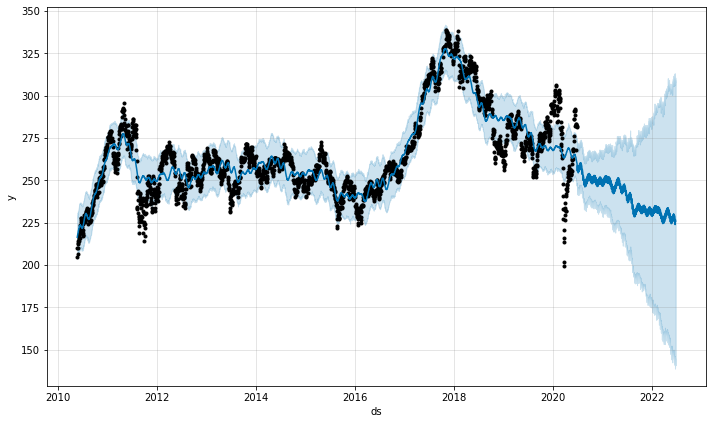

In [12]:
fig1 = m.plot(forecast)

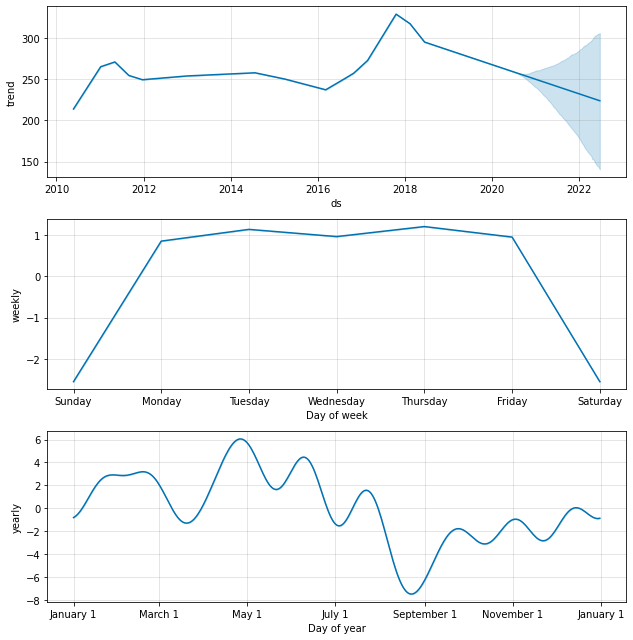

In [13]:
fig2 = m.plot_components(forecast)